In [14]:
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playercareerstats, PlayerGameLog, CommonPlayerInfo, ShotChartDetail
from nba_api.live.nba.endpoints import scoreboard
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
def find_active_players():
    all_players = players.get_players()
    active_players = []
    for player in all_players:
        if player["is_active"] is True:
            active_players.append(player["full_name"])
    return active_players

In [36]:
active_players = find_active_players()
active_players

['Precious Achiuwa',
 'Steven Adams',
 'Bam Adebayo',
 'Ochai Agbaji',
 'Santi Aldama',
 'Trey Alexander',
 'Nickeil Alexander-Walker',
 'Grayson Allen',
 'Jarrett Allen',
 'Jose Alvarado',
 'Kyle Anderson',
 'Giannis Antetokounmpo',
 'Cole Anthony',
 'OG Anunoby',
 'Taran Armstrong',
 'Deni Avdija',
 'Deandre Ayton',
 'Marcus Bagley',
 'Marvin Bagley III',
 'Patrick Baldwin Jr.',
 'LaMelo Ball',
 'Lonzo Ball',
 'Mo Bamba',
 'Paolo Banchero',
 'Desmond Bane',
 'Dalano Banton',
 'Dominick Barlow',
 'Harrison Barnes',
 'Scottie Barnes',
 'RJ Barrett',
 'Charles Bassey',
 'Emoni Bates',
 'Jamison Battle',
 'Nicolas Batum',
 'Damion Baugh',
 'Bradley Beal',
 'Malik Beasley',
 'MarJon Beauchamp',
 'Reece Beekman',
 'Saddiq Bey',
 'Goga Bitadze',
 'Bismack Biyombo',
 'Anthony Black',
 'Bogdan Bogdanović',
 'Bol Bol',
 'Adem Bona',
 'Devin Booker',
 'Brandon Boston',
 'Chris Boucher',
 'Jamaree Bouyea',
 'Tony Bradley',
 'Malaki Branham',
 'Christian Braun',
 'Jalen Bridges',
 'Mikal Bridges'

In [29]:
def stats_players(nom, active_players, season):
    if nom in active_players:
            player_sheet = players.find_players_by_full_name(nom)[0]
            player_id = player_sheet["id"]
            stats = PlayerGameLog(player_id=player_id,season=season)
            result = stats.get_data_frames()[0]
    else:
          print(f"Le joueur {nom} n'est pas actif ou n'existe pas ")
          return None
    return result

    

In [39]:
stats_players("Stephen Curry", active_players,"2023-24")


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,201939,0022301182,"Apr 12, 2024",GSW vs. NOP,L,32,12,23,0.522,...,4,4,5,1,0,7,2,33,-8,1
1,22023,201939,0022301169,"Apr 11, 2024",GSW @ POR,W,36,8,22,0.364,...,7,7,8,1,2,2,0,22,7,1
2,22023,201939,0022301155,"Apr 09, 2024",GSW @ LAL,W,32,7,9,0.778,...,7,7,8,1,2,1,2,23,13,1
3,22023,201939,0022301097,"Apr 05, 2024",GSW @ DAL,L,35,9,23,0.391,...,5,6,5,1,0,2,2,28,-5,1
4,22023,201939,0022301113,"Apr 04, 2024",GSW @ HOU,W,31,9,14,0.643,...,6,6,6,0,0,3,2,29,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,22023,201939,0022300126,"Nov 01, 2023",GSW vs. SAC,W,32,7,15,0.467,...,4,5,3,0,0,7,3,21,-6,1
70,22023,201939,0022300108,"Oct 30, 2023",GSW @ NOP,W,30,15,22,0.682,...,5,5,5,2,0,3,1,42,13,1
71,22023,201939,0022300096,"Oct 29, 2023",GSW @ HOU,W,31,6,16,0.375,...,6,7,6,0,1,1,1,24,-2,1
72,22023,201939,0022300087,"Oct 27, 2023",GSW @ SAC,W,35,14,19,0.737,...,3,4,4,2,0,4,0,41,10,1


# heatmap shoot

In [5]:
def get_shot_data(nom_joueur,saison):

SyntaxError: incomplete input (194624145.py, line 1)

In [6]:
curry = players.find_players_by_full_name("Stephen Curry")[0]
player_id = curry["id"]

In [11]:
info = CommonPlayerInfo(player_id=player_id)
team_id = info.get_data_frames()[0]['TEAM_ID'].values[0]
team_id


np.int64(1610612744)

In [26]:
help(ShotChartDetail)

Help on class ShotChartDetail in module nba_api.stats.endpoints.shotchartdetail:

class ShotChartDetail(nba_api.stats.endpoints._base.Endpoint)
 |  ShotChartDetail(team_id, player_id, context_measure_simple='PTS', last_n_games='0', league_id='00', month='0', opponent_team_id=0, period='0', season_type_all_star='Regular Season', ahead_behind_nullable='', clutch_time_nullable='', context_filter_nullable='', date_from_nullable='', date_to_nullable='', end_period_nullable='', end_range_nullable='', game_id_nullable='', game_segment_nullable='', location_nullable='', outcome_nullable='', player_position_nullable='', point_diff_nullable='', position_nullable='', range_type_nullable='', rookie_year_nullable='', season_nullable='', season_segment_nullable='', start_period_nullable='', start_range_nullable='', vs_conference_nullable='', vs_division_nullable='', proxy=None, headers=None, timeout=30, get_request=True)
 |
 |  Method resolution order:
 |      ShotChartDetail
 |      nba_api.stats.e

In [36]:
shot_data = ShotChartDetail(team_id=team_id,player_id=player_id,season_type_all_star='Regular Season',season_nullable='2022-23',context_measure_simple='FGA') 
df_shots = shot_data.get_data_frames()[0]
df_shots

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200002,61,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,27,...,Center(C),Less Than 8 ft.,6,60,10,1,0,20221018,GSW,LAL
1,Shot Chart Detail,0022200002,64,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,22,...,Right Side(R),16-24 ft.,16,150,79,1,1,20221018,GSW,LAL
2,Shot Chart Detail,0022200002,68,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,...,Center(C),24+ ft.,27,7,273,1,0,20221018,GSW,LAL
3,Shot Chart Detail,0022200002,102,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,16,...,Left Side Center(LC),24+ ft.,24,-151,197,1,0,20221018,GSW,LAL
4,Shot Chart Detail,0022200002,132,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,52,...,Left Side Center(LC),24+ ft.,24,-81,229,1,0,20221018,GSW,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,Shot Chart Detail,0022201230,312,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,3,...,Left Side Center(LC),24+ ft.,28,-172,223,1,0,20230409,POR,GSW
1129,Shot Chart Detail,0022201230,317,201939,Stephen Curry,1610612744,Golden State Warriors,2,0,32,...,Right Side Center(RC),24+ ft.,26,121,239,1,1,20230409,POR,GSW
1130,Shot Chart Detail,0022201230,342,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,48,...,Center(C),Less Than 8 ft.,3,33,15,1,1,20230409,POR,GSW
1131,Shot Chart Detail,0022201230,353,201939,Stephen Curry,1610612744,Golden State Warriors,3,10,0,...,Left Side(L),24+ ft.,23,-225,79,1,1,20230409,POR,GSW


In [38]:
df_shots[df_shots["SHOT_MADE_FLAG"] == 0]


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200002,61,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,27,...,Center(C),Less Than 8 ft.,6,60,10,1,0,20221018,GSW,LAL
2,Shot Chart Detail,0022200002,68,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,...,Center(C),24+ ft.,27,7,273,1,0,20221018,GSW,LAL
3,Shot Chart Detail,0022200002,102,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,16,...,Left Side Center(LC),24+ ft.,24,-151,197,1,0,20221018,GSW,LAL
4,Shot Chart Detail,0022200002,132,201939,Stephen Curry,1610612744,Golden State Warriors,1,3,52,...,Left Side Center(LC),24+ ft.,24,-81,229,1,0,20221018,GSW,LAL
5,Shot Chart Detail,0022200002,150,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,58,...,Left Side Center(LC),16-24 ft.,17,-97,147,1,0,20221018,GSW,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Shot Chart Detail,0022201230,77,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,46,...,Left Side Center(LC),24+ ft.,31,-202,246,1,0,20230409,POR,GSW
1124,Shot Chart Detail,0022201230,244,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,19,...,Center(C),Less Than 8 ft.,1,10,13,1,0,20230409,POR,GSW
1126,Shot Chart Detail,0022201230,284,201939,Stephen Curry,1610612744,Golden State Warriors,2,3,2,...,Left Side Center(LC),24+ ft.,28,-169,230,1,0,20230409,POR,GSW
1128,Shot Chart Detail,0022201230,312,201939,Stephen Curry,1610612744,Golden State Warriors,2,1,3,...,Left Side Center(LC),24+ ft.,28,-172,223,1,0,20230409,POR,GSW


In [39]:
df_shots[["LOC_X", "LOC_Y", "SHOT_ATTEMPTED_FLAG", "SHOT_MADE_FLAG","EVENT_TYPE"]].head()

,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,EVENT_TYPE
0,60,10,1,0,Missed Shot
1,150,79,1,1,Made Shot
2,7,273,1,0,Missed Shot
3,-151,197,1,0,Missed Shot
4,-81,229,1,0,Missed Shot


In [40]:
df_shots["EVENT_TYPE"].value_counts()

EVENT_TYPE
Missed Shot    574
Made Shot      559
Name: count, dtype: int64

In [43]:
df_shots["SHOT_MADE_FLAG"].value_counts()

SHOT_MADE_FLAG
0    574
1    559
Name: count, dtype: int64

In [42]:
df_shots = df_shots.dropna(subset=["LOC_X", "LOC_Y"])

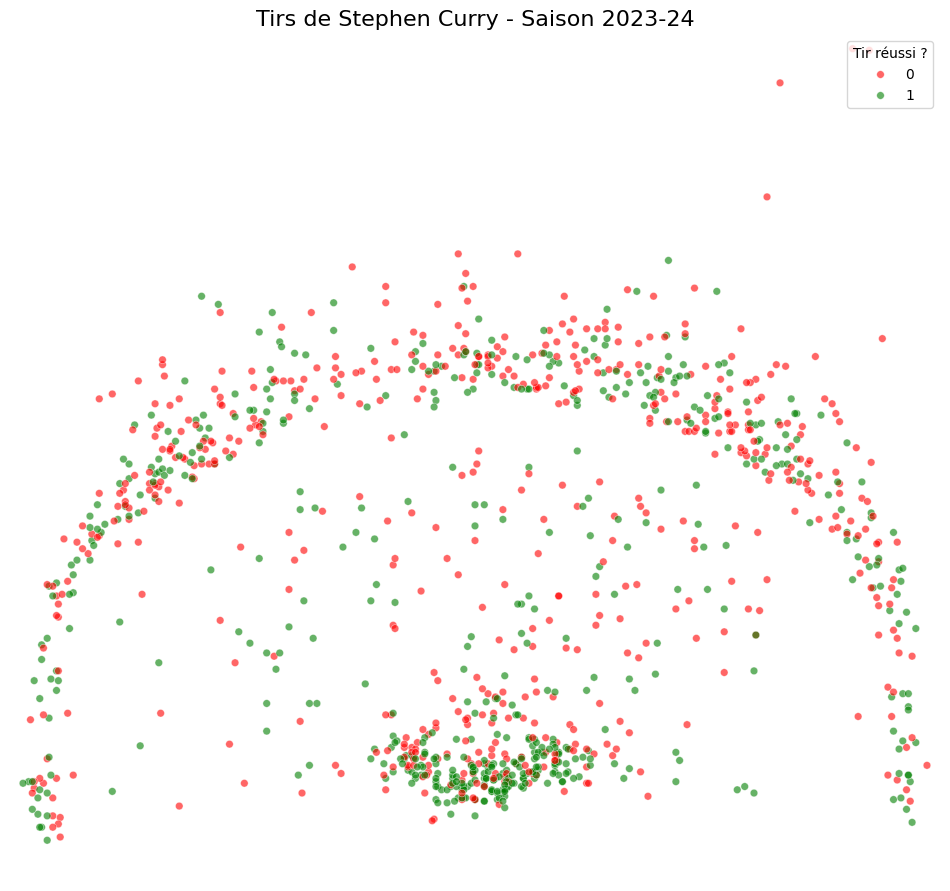

In [44]:
plt.figure(figsize=(12, 11))
plt.title("Tirs de Stephen Curry - Saison 2023-24", fontsize=16)

# Scatterplot avec couleurs selon réussite
sns.scatterplot(
data=df_shots,
x="LOC_X",
y="LOC_Y",
hue="SHOT_MADE_FLAG",
palette={1: "green", 0: "red"},
alpha=0.6,
s=30
)

# Limites du terrain (demi-terrain NBA)
plt.xlim(-250, 250)
plt.ylim(-50, 470)
plt.axis('off')
plt.legend(title="Tir réussi ?", loc="upper right")
plt.show()